importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection and analysis

In [2]:
customer_data = pd.read_csv("Mall_Customers.csv")
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Mean spending score: 50
Mean annual income: 60K
Mean age: 38

In [5]:
customer_data.isnull().sum() # checking if null values are present

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

To perform customer segmentation, we will be taking only the two columns namely the annual income and spending score. Thus, modify the data to include these 2 features.

In [6]:
customer_data_V1 = customer_data.drop(['CustomerID', 'Gender','Age'], axis=1)
customer_data_V1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Choosing the optimal number of clusters.
The parameter we use is WCSS(within cluster sum of squares). When you have optimal number of clusters, the WCSS value is low.

In [7]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(customer_data_V1)
    wcss.append(kmeans.inertia_)

In [8]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25011.839349156595,
 21850.16528258562,
 19672.07284901432]

Plotting the graph

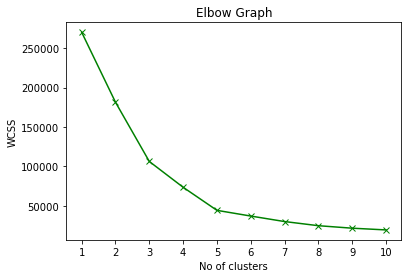

In [9]:
ax = plt.gca()
x_points = np.arange(1,11)
ax.set_title("Elbow Graph")
ax.set_xlabel("No of clusters")
ax.set_ylabel("WCSS")
ax.set_xticks(np.arange(1,11))
ax.plot(x_points,wcss, marker = 'x', c = 'g')

The optimal number of cluster is **5** as after 5 the drop in WCSS value is not significant.

### Training the k-means clustering model

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=65)

# return label for every data point to determine which cluster they belong to

predict = kmeans.fit_predict(customer_data_V1)
print(predict)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 4 3 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 2 1 4 1 2 1 2 1 4 1 2 1 2 1 2 1 2 1 4 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


#### Visualizing all the clusters

In [11]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

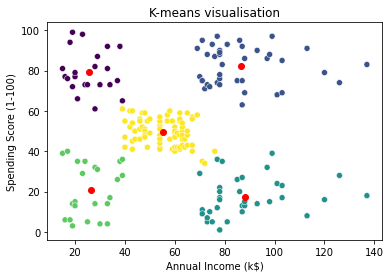

In [12]:
x = customer_data_V1['Annual Income (k$)']
y = customer_data_V1['Spending Score (1-100)']
plt.title('K-means visualisation')
sns.scatterplot(x=x,y=y, c = predict)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'red')

Here we can see 5 clusters based on spending score and annual income. We can target certain clusters to increase their spending through offers and loyalty systems. Our objective is to maintain loyalty and provide great customer service for people with low annual income and spending score and to increase the spending score of customers with medium to high annual income through marketing, loyalty points, exclusive offers etc.